In [1]:
import os
import pandas as pd

In [3]:
files=[file for file in os.listdir('C:\\Users\\KIIT\\Desktop\\Python\\.ipynb_checkpoints\\Pandas-Data-Science-Tasks-master\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\')]
all_data=pd.DataFrame()
for file in files:
    df=pd.read_csv('C:\\Users\\KIIT\\Desktop\\Python\\.ipynb_checkpoints\\Pandas-Data-Science-Tasks-master\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\'+file)
    all_data=pd.concat([all_data,df])
    all_data.to_csv("all_data.csv",index=False)

In [4]:
all_datas=pd.read_csv('all_data.csv')

In [6]:
all_datas.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [ ]:
#DATA CLEANING


In [9]:
nan_df = all_datas[all_datas.isna().any(axis=1)]
display(nan_df.head())

all_datas = all_datas.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [10]:
all_datas=all_datas[all_datas['Order Date'].str[0:2]!='Or']

In [11]:
all_datas['Month'] = all_datas['Order Date'].str[0:2]
all_datas['Month'] = all_datas['Month'].astype('int32')
all_datas.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#Best month of sales
#Money earned in that month

In [ ]:
#adding sales column

In [14]:
all_datas['Quantity Ordered'] = pd.to_numeric(all_datas['Quantity Ordered'])
all_datas['Price Each'] = pd.to_numeric(all_datas['Price Each'])
all_datas.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [15]:
all_datas['Sales']=all_datas['Quantity Ordered']*all_datas['Price Each']
all_datas.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [ ]:
#best_month

In [22]:
results=all_datas.groupby('Month').sum()
results


C:\Users\KIIT\AppData\Local\Temp\ipykernel_28720\3906647668.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results=all_datas.groupby('Month').sum()


,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


In [ ]:
##DECEMBER IS THE ANSWER

Inference:
December is the holiday season, christmas and new year are the festival that can impact the sales.

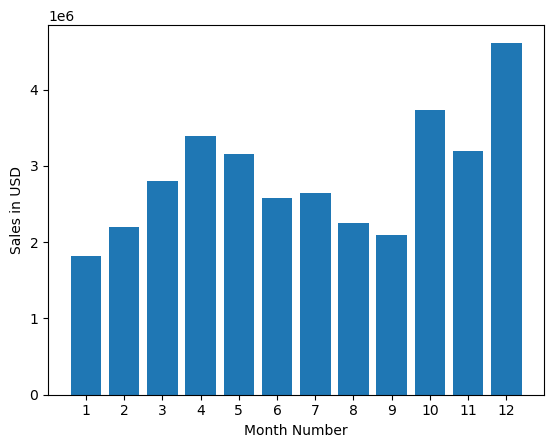

In [23]:
import matplotlib.pyplot as plt
months=range(1,13)
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD')
plt.xlabel('Month Number')
plt.show()

In [ ]:
 ###Which city has the highest sales

In [24]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_datas['City'] = all_datas['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_datas.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [ ]:
#highest sales

In [26]:
results=all_datas.groupby('City').sum()
results


C:\Users\KIIT\AppData\Local\Temp\ipykernel_28720\2161236440.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results=all_datas.groupby('City').sum()


,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


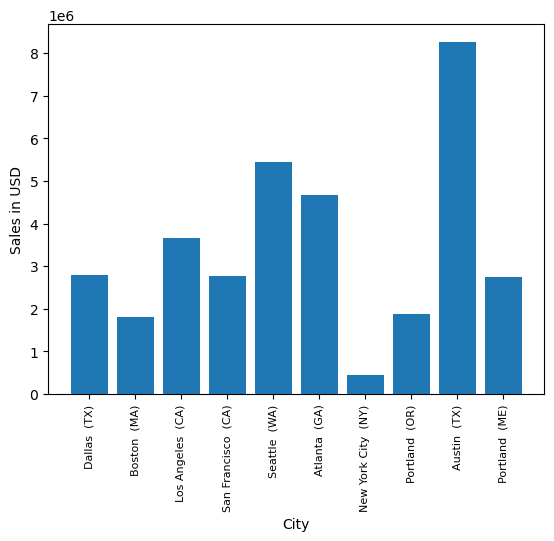

In [28]:
import matplotlib.pyplot as plt
months=all_datas['City'].unique()
plt.bar(months, results['Sales'])
plt.xticks(months,rotation='vertical',size=8)
plt.ylabel('Sales in USD')
plt.xlabel('City')
plt.show()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_28720\3087580510.py:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  keys = [city for city, df in all_datas.groupby(['City'])]
C:\Users\KIIT\AppData\Local\Temp\ipykernel_28720\3087580510.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.bar(keys,all_datas.groupby(['City']).sum()['Sales'])


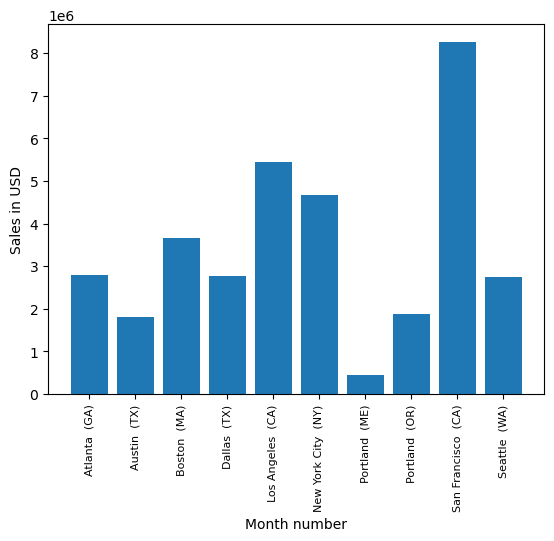

In [29]:
import matplotlib.pyplot as plt

keys = [city for city, df in all_datas.groupby(['City'])]

plt.bar(keys,all_datas.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in USD')
plt.xlabel('Month number')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

Inference:
As data concerned is an electronics store data
It maybe the case that silicon valley needs more electrical items.

In [ ]:
##What time should be the advertisements be shown to maximise buying probablity

In [ ]:
##logic:we could use the time stamp in time

In [31]:
all_datas['Order Date']=pd.to_datetime(all_datas['Order Date'])

In [36]:
all_datas['Hour'] = pd.to_datetime(all_datas['Order Date']).dt.hour
all_datas['Minute'] = pd.to_datetime(all_datas['Order Date']).dt.minute
all_datas.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


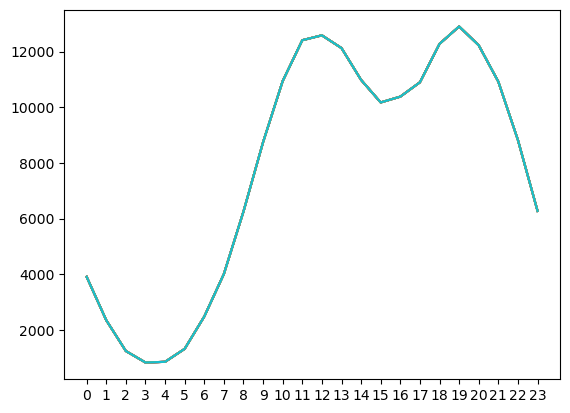

In [38]:
hours=[hour for hour,df in all_datas.groupby('Hour')]
plt.plot(hours,all_datas.groupby(['Hour']).count())
plt.xticks(hours)
plt.show()

##Recomendation:
Advertise around 11 AM or 7 PM